In [377]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm



In [378]:
#reading data
absenteeism_data = pd.read_csv('Absenteeism_at_work.csv')
print(absenteeism_data.head(5))

   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

  Work load Average/day   ...  Disciplinary failure  Education  Son  \
0  

In [379]:
absenteeism_data.rename(columns = {'Work load Average/day ':'Workload'}, inplace = True)

In [380]:
list(absenteeism_data)

['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Workload',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [381]:
absenteeism_data['Workload'] = absenteeism_data['Workload'].str.replace(',', '').astype(float)

In [382]:
#descriptive statistics
absenteeism_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Workload,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


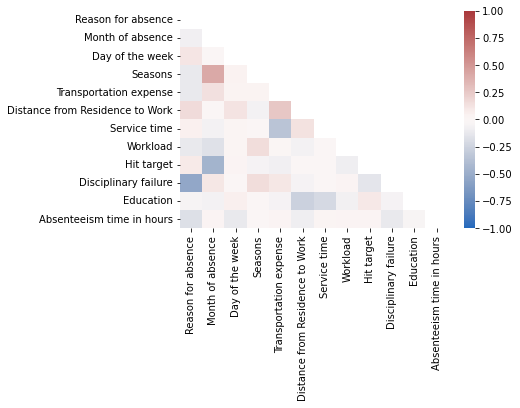

In [383]:
corrMatrix = absenteeism_data.corr()
heatmap_1=corrMatrix.drop(['Pet','Weight', 'Age', 'Social drinker', 'Social smoker', 'Height', 'Body mass index', 'Son', 'ID']).drop(['Pet','Weight', 'Age', 'Social drinker', 'Social smoker', 'Height', 'Body mass index', 'Son', 'ID'],axis=1)
mask = np.triu(np.ones_like(heatmap_1, dtype=bool))
sns.heatmap(heatmap_1, annot=False, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [384]:
# All columns except ID and Absenteeism in hours are descriptive features
descriptive_features = absenteeism_data.iloc[:,1:-1]
descriptive_features

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Workload,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,26,7,3,1,289,36,13,33,239554.0,97,0,1,2,1,0,1,90,172,30
1,0,7,3,1,118,13,18,50,239554.0,97,1,1,1,1,0,0,98,178,31
2,23,7,4,1,179,51,18,38,239554.0,97,0,1,0,1,0,0,89,170,31
3,7,7,5,1,279,5,14,39,239554.0,97,0,1,2,1,1,0,68,168,24
4,23,7,5,1,289,36,13,33,239554.0,97,0,1,2,1,0,1,90,172,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264604.0,93,0,1,2,1,0,1,90,172,30
736,11,7,3,1,235,11,14,37,264604.0,93,0,3,1,0,0,1,88,172,29
737,0,0,3,1,118,14,13,40,271219.0,95,0,1,1,1,0,8,98,170,34
738,0,0,4,2,231,35,14,39,271219.0,95,0,1,2,1,0,2,100,170,35


In [385]:
# Absenteeism time in hours is the Target
target_feature = absenteeism_data.iloc[:,-1:]
target_feature

,Absenteeism time in hours
0,4
1,0
2,2
3,4
4,2
...,...
735,8
736,4
737,0
738,0


In [386]:
descriptive_features.dtypes

Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Workload                           float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
dtype: object

Feature: 1, Score: 0.20797
Feature: 2, Score: 0.09889
Feature: 3, Score: 0.12366
Feature: 4, Score: 0.05546
Feature: 5, Score: 0.04173
Feature: 9, Score: 0.11881
Feature: 10, Score: 0.09298


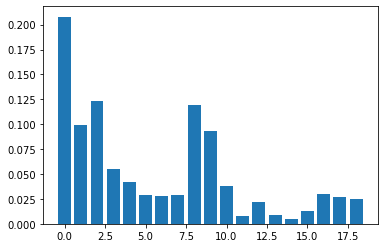

In [387]:
#randome forrest to identify important features
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators=200)
classifier_RF.fit(descriptive_features, target_feature)
importance_RF = classifier_RF.feature_importances_
importance_RF

# summarize feature importance
for i,v in enumerate(importance_RF):
    if v>=0.04:  ## Only taking features having importance score > 0.04
	    print('Feature: %0d, Score: %.5f' % (i+1,v))
# plot feature importance
plt.bar([x for x in range(len(importance_RF))], importance_RF)
plt.show()

In [388]:
descriptive_features2 = absenteeism_data.iloc[:,[1,2,3,4,5,9,10]]
descriptive_features2

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Workload,Hit target
0,26,7,3,1,289,239554.0,97
1,0,7,3,1,118,239554.0,97
2,23,7,4,1,179,239554.0,97
3,7,7,5,1,279,239554.0,97
4,23,7,5,1,289,239554.0,97
...,...,...,...,...,...,...,...
735,14,7,3,1,289,264604.0,93
736,11,7,3,1,235,264604.0,93
737,0,0,3,1,118,271219.0,95
738,0,0,4,2,231,271219.0,95


Feature: 1, Score: 0.30282
Feature: 2, Score: 0.08859
Feature: 3, Score: 0.14900
Feature: 4, Score: 0.04615
Feature: 5, Score: 0.19813
Feature: 6, Score: 0.12313
Feature: 7, Score: 0.09218


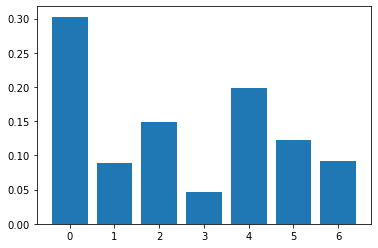

In [389]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF2 = RandomForestClassifier(n_estimators=200)
classifier_RF2.fit(descriptive_features2, target_feature)
importance_RF2 = classifier_RF2.feature_importances_
importance_RF2

# summarize feature importance
for i,v in enumerate(importance_RF2):
    if v>=0.04:  ## Only taking features having importance score > 0.04
	    print('Feature: %0d, Score: %.5f' % (i+1,v))
# plot feature importance
plt.bar([x for x in range(len(importance_RF2))], importance_RF2)
plt.show()

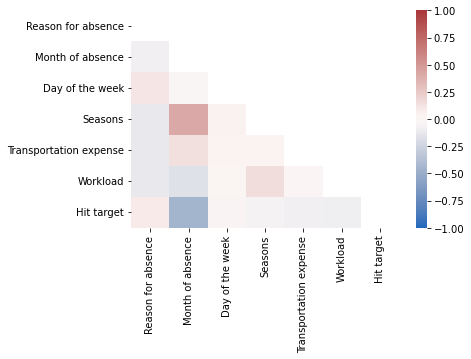

In [390]:
corrMatrix2 = descriptive_features2.corr()
heatmap_1= corrMatrix2
mask = np.triu(np.ones_like(heatmap_1, dtype=bool))
sns.heatmap(heatmap_1, annot=False, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

Feature: 1, Score: 0.30282
Feature: 2, Score: 0.08859
Feature: 3, Score: 0.14900
Feature: 4, Score: 0.04615
Feature: 5, Score: 0.19813
Feature: 6, Score: 0.12313
Feature: 7, Score: 0.09218


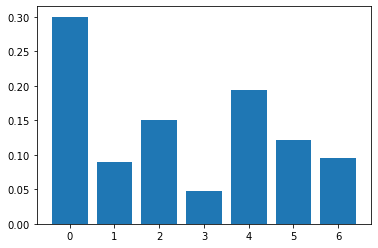

In [391]:
from sklearn.preprocessing import RobustScaler

robust_scaled = RobustScaler().fit_transform(descriptive_features2)

from sklearn.ensemble import RandomForestClassifier
classifier_RF3 = RandomForestClassifier(n_estimators=200)
classifier_RF3.fit(robust_scaled, target_feature)
importance_RF3 = classifier_RF3.feature_importances_
importance_RF3

# summarize feature importance
for i,v in enumerate(importance_RF2):
    if v>=0.04:  ## Only taking features having importance score > 0.04
	    print('Feature: %0d, Score: %.5f' % (i+1,v))
# plot feature importance
plt.bar([x for x in range(len(importance_RF3))], importance_RF3)
plt.show()


<AxesSubplot:xlabel='Absenteeism time in hours', ylabel='Density'>

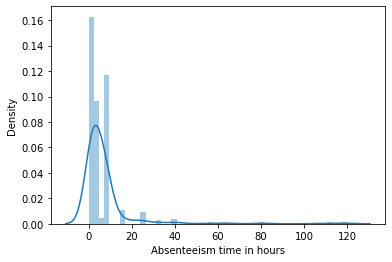

In [392]:
#plt.hist(absenteeism_data['Absenteeism time in hours'])
sns.distplot(absenteeism_data['Absenteeism time in hours'])

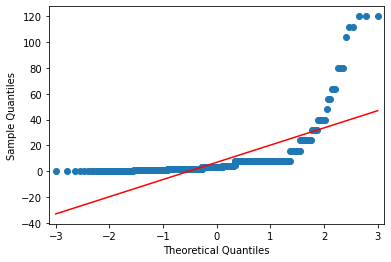

In [393]:
fig = sm.qqplot(absenteeism_data['Absenteeism time in hours'],line='s')
plt.show()

<AxesSubplot:xlabel='Absenteeism time in hours'>

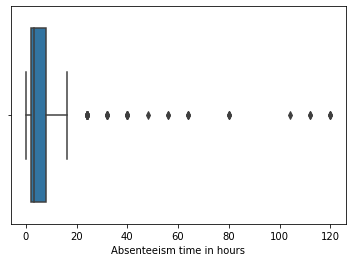

In [394]:
import seaborn as sns
sns.boxplot(x=absenteeism_data['Absenteeism time in hours'])


In [395]:
#reading data
data = pd.read_csv('Absenteeism_at_work.csv')
print(data.head(5))

   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

  Work load Average/day   ...  Disciplinary failure  Education  Son  \
0  

In [396]:
data.columns,data.shape

(Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
        'Seasons', 'Transportation expense', 'Distance from Residence to Work',
        'Service time', 'Age', 'Work load Average/day ', 'Hit target',
        'Disciplinary failure', 'Education', 'Son', 'Social drinker',
        'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
        'Absenteeism time in hours'],
       dtype='object'),
 (740, 21))

In [397]:
# Checking unique values for absenteeism hours in the dataset.
list(np.sort(data['Absenteeism time in hours'].unique()))

[0, 1, 2, 3, 4, 5, 7, 8, 16, 24, 32, 40, 48, 56, 64, 80, 104, 112, 120]

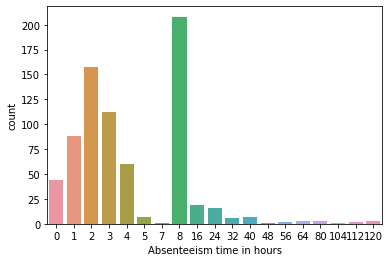

In [398]:
## Visualizing the number of absenteeism hours in the dataset.
plt = sns.countplot(data['Absenteeism time in hours'])

In [399]:
data['Work load Average/day '] = data['Work load Average/day '].str.replace(',', '').astype(float)

In [400]:
#1st column i.e. label is the target feature
target_feature = data.iloc[:,-1:]

#All features except the 'label' column
descriptive_features = data.iloc[:,:-1]

## Printing the size of data 
print(descriptive_features.shape,target_feature.shape)

(740, 20) (740, 1)


In [401]:
target_feature

,Absenteeism time in hours
0,4
1,0
2,2
3,4
4,2
...,...
735,8
736,4
737,0
738,0


### Standard Scaler on Descriptive Features

In [402]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(descriptive_features))

print(scaler.mean_)

#print(scaler.transform(data))
descriptive_features = scaler.transform(descriptive_features)
descriptive_features

StandardScaler()
[1.80175676e+01 1.92162162e+01 6.32432432e+00 3.91486486e+00
 2.54459459e+00 2.21329730e+02 2.96310811e+01 1.25540541e+01
 3.64500000e+01 2.71490235e+05 9.45878378e+01 5.40540541e-02
 1.29189189e+00 1.01891892e+00 5.67567568e-01 7.29729730e-02
 7.45945946e-01 7.90351351e+01 1.72114865e+02 2.66770270e+01]


array([[-0.63716146,  0.80493838,  0.19676258, ...,  0.85167289,
        -0.01904601,  0.77593223],
       [ 1.63271857, -2.28012426,  0.19676258, ...,  1.47305611,
         0.97582783,  1.00943766],
       [-1.36352307,  0.44896961,  0.19676258, ...,  0.77399998,
        -0.35067062,  1.00943766],
       ...,
       [-1.27272787, -2.28012426, -1.84169773, ...,  1.47305611,
        -0.35067062,  1.70995395],
       [-0.90954706, -2.28012426, -1.84169773, ...,  1.62840192,
        -0.35067062,  1.94345938],
       [ 1.54192337, -2.28012426, -1.84169773, ..., -0.15807485,
         0.47839091, -0.39159492]])

### Checking shapes of Descriptive and Target features

In [403]:
descriptive_features.shape,target_feature.shape

((740, 20), (740, 1))

# Classifiers with All Features

# SVM

In [404]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import random
from sklearn.svm import SVC
import sklearn.metrics as sk
import warnings
warnings.simplefilter("ignore")

In [405]:
x1_train, x1_test, y1_train, y1_test = train_test_split(descriptive_features, target_feature, test_size = 0.3, random_state = 0)

In [406]:
#Linear SVM
print('Linear Model',end='\n')
lsvclassifier = SVC(kernel='linear')
lsvclassifier.fit(x1_train, y1_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = lsvclassifier, X = x1_train, y = y1_train, cv = 10)
mean_svm_linear=accuracies.mean()
std_svm_linear=accuracies.std()

#After using 10 fold cross validation
print('After 10 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_linear*100,end='\n')
print('Standard deviation of Accuracies',std_svm_linear*100,end='\n')

# #Predict SVM
# y_predl = lsvclassifier.predict(x1_test)

# #Confusion Matrix
# print('Test Output:')
# print('Confusion Matrix:')
# print(sk.confusion_matrix(y1_test,y_predl))
# print('Classification Report:')
# print(sk.classification_report(y1_test,y_predl))
# #print('Accuracy: ',sk.accuracy_score(y1_test, y_predl, normalize=True, sample_weight=None))

Linear Model
After 10 fold cross validation:
Mean of Accuracies:  43.24660633484164
Standard deviation of Accuracies 4.746054471214114


## Decision Tree

In [407]:

from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x1_train, y1_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = dt_classifier, X = x1_train, y = y1_train, cv = 10)
mean_dt=accuracies.mean()
std_dt=accuracies.std()

#After using 10 fold cross validation
print('After 10 fold cross validation:')
print('Mean of Accuracies: ',mean_dt*100,end='\n')
print('Standard deviation of Accuracies',std_dt*100,end='\n')

After 10 fold cross validation:
Mean of Accuracies:  38.23906485671192
Standard deviation of Accuracies 7.215276439338999


# Random Forest

In [408]:
#training random Forest
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x1_train, y1_train)

RandomForestClassifier()

In [409]:
#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = rf, X = x1_train, y = y1_train, cv = 10)
mean_rf=accuracies.mean()
std_rf=accuracies.std()

#After using 10 fold cross validation
print('After 10 fold cross validation:')
print('Mean of Accuracies: ',mean_rf*100,end='\n')
print('Standard deviation of Accuracies',std_rf*100,end='\n')

# #Predict rf
# y_predl = rf.predict(x1_test)

# #Confusion Matrix
# print('Test Output:')
# print('Confusion Matrix:')
# print(sk.confusion_matrix(y1_test,y_predl))
# print('Classification Report:')
# print(sk.classification_report(y1_test,y_predl))
# print('Accuracy: ',sk.accuracy_score(y1_test, y_predl, normalize=True, sample_weight=None))

After 10 fold cross validation:
Mean of Accuracies:  44.41553544494721
Standard deviation of Accuracies 6.36157206972503


# Classifiers with important Features i.e. Descriptive Features 2

In [410]:
descriptive_features2 = absenteeism_data.iloc[:,[1,2,3,6,7,9,10,11]]
descriptive_features2

,Reason for absence,Month of absence,Day of the week,Distance from Residence to Work,Service time,Workload,Hit target,Disciplinary failure
0,26,7,3,36,13,239554.0,97,0
1,0,7,3,13,18,239554.0,97,1
2,23,7,4,51,18,239554.0,97,0
3,7,7,5,5,14,239554.0,97,0
4,23,7,5,36,13,239554.0,97,0
...,...,...,...,...,...,...,...,...
735,14,7,3,36,13,264604.0,93,0
736,11,7,3,11,14,264604.0,93,0
737,0,0,3,14,13,271219.0,95,0
738,0,0,4,35,14,271219.0,95,0


### Standard Scaler on Descriptive Features

In [411]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(descriptive_features2))

print(scaler.mean_)

#print(scaler.transform(data))
descriptive_features2 = scaler.transform(descriptive_features2)
descriptive_features2

StandardScaler()
[1.92162162e+01 6.32432432e+00 3.91486486e+00 2.96310811e+01
 1.25540541e+01 2.71490235e+05 9.45878378e+01 5.40540541e-02]


array([[ 0.80493838,  0.19676258, -0.64394734, ..., -0.81821241,
         0.63868581, -0.23904572],
       [-2.28012426,  0.19676258, -0.64394734, ..., -0.81821241,
         0.63868581,  4.18330013],
       [ 0.44896961,  0.19676258,  0.0599242 , ..., -0.81821241,
         0.63868581, -0.23904572],
       ...,
       [-2.28012426, -1.84169773, -0.64394734, ..., -0.0069491 ,
         0.10913119, -0.23904572],
       [-2.28012426, -1.84169773,  0.0599242 , ..., -0.0069491 ,
         0.10913119, -0.23904572],
       [-2.28012426, -1.84169773,  1.46766727, ..., -0.0069491 ,
         0.10913119, -0.23904572]])

### Checking shapes of Descriptive and Target features

In [412]:
descriptive_features2.shape,target_feature.shape

((740, 8), (740, 1))

# Classifiers with All Features

# SVM

In [413]:
x1_train2, x1_test2, y1_train2, y1_test2 = train_test_split(descriptive_features2, target_feature, test_size = 0.3, random_state = 100)

In [414]:
#Linear SVM
print('Linear Model',end='\n')
lsvclassifier2 = SVC(kernel='linear',probability=True)
lsvclassifier2.fit(x1_train2, y1_train2)

#Applying k-Fold Cross Validation
accuracies2 = cross_val_score(estimator = lsvclassifier2, X = x1_train2, y = y1_train2, cv = 10)
mean_svm_linear2=accuracies2.mean()
std_svm_linear2=accuracies2.std()

#After using 10 fold cross validation
print('After 10 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_linear2*100,end='\n')
print('Standard deviation of Accuracies',std_svm_linear2*100,end='\n')

# #Predict SVM
# y_predl2 = lsvclassifier2.predict(x1_test2)

# #Confusion Matrix
# print('Test Output:')
# print('Confusion Matrix:')
# print(sk.confusion_matrix(y1_test2,y_predl2))
# print('Classification Report:')
# print(sk.classification_report(y1_test2,y_predl2))
# print('Accuracy: ',sk.accuracy_score(y1_test2, y_predl2, normalize=True, sample_weight=None))

Linear Model
After 10 fold cross validation:
Mean of Accuracies:  45.38838612368024
Standard deviation of Accuracies 6.5590930296128445


## Decision Tree

In [415]:

dt_classifier2 = DecisionTreeClassifier()
dt_classifier2.fit(x1_train2, y1_train2)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = dt_classifier2, X = x1_train2, y = y1_train2, cv = 10)
mean_dt2=accuracies.mean()
std_dt2=accuracies.std()

#After using 10 fold cross validation
print('After 10 fold cross validation:')
print('Mean of Accuracies: ',mean_dt2*100,end='\n')
print('Standard deviation of Accuracies',std_dt2*100,end='\n')

After 10 fold cross validation:
Mean of Accuracies:  39.57013574660634
Standard deviation of Accuracies 3.505294935361636


# Random Forest

In [416]:
#training random Forest
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
rf2=RandomForestClassifier(n_estimators=1000)
rf2.fit(x1_train2, y1_train2)

RandomForestClassifier(n_estimators=1000)

In [417]:
#Applying k-Fold Cross Validation
accuracies2 = cross_val_score(estimator = rf2, X = x1_train2, y = y1_train2, cv = 10)
mean_rf2=accuracies2.mean()
std_rf2=accuracies2.std()

#After using 10 fold cross validation
print('After 10 fold cross validation:')
print('Mean of Accuracies: ',mean_rf2*100,end='\n')
print('Standard deviation of Accuracies',std_rf2*100,end='\n')

# #Predict rf
# y_predl2 = rf2.predict(x1_test2)

# #Confusion Matrix
# print('Test Output:')
# print('Confusion Matrix:')
# print(sk.confusion_matrix(y1_test2,y_predl2))
# print('Classification Report:')
# print(sk.classification_report(y1_test2,y_predl2))
# print('Accuracy: ',sk.accuracy_score(y1_test2, y_predl2, normalize=True, sample_weight=None))

After 10 fold cross validation:
Mean of Accuracies:  49.60030165912519
Standard deviation of Accuracies 5.191588819737426


## Ensemble Technique
### Voting Classifier with Hard Voting on complete dataset

In [418]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


voting_clf_hard = VotingClassifier(
    estimators=[('linearsvc', lsvclassifier), ('rf', rf), ('dt', dt_classifier)],
    voting='hard')



In [419]:
#Applying k-Fold Cross Validation
accuracies2 = cross_val_score(estimator = voting_clf_hard, X = x1_train2, y = y1_train2, cv = 10)
mean_vch=accuracies2.mean()
std_vch=accuracies2.std()

#After using 10 fold cross validation
print('After 10 fold cross validation:')
print('Mean of Accuracies: ',mean_vch*100,end='\n')
print('Standard deviation of Accuracies',std_vch*100,end='\n')

After 10 fold cross validation:
Mean of Accuracies:  48.27300150829562
Standard deviation of Accuracies 3.1325651657253712


## Ensemble Technique
### Voting Classifier with Hard Voting on reduced dataset.

In [420]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


voting_clf_hard2 = VotingClassifier(
    estimators=[('linearsvc', lsvclassifier2), ('rf', rf2), ('dt', dt_classifier2)],
    voting='hard')



In [421]:
#Applying k-Fold Cross Validation
accuracies2 = cross_val_score(estimator = voting_clf_hard2, X = x1_train2, y = y1_train2, cv = 10)
mean_vch2=accuracies2.mean()
std_vch2=accuracies2.std()

#After using 10 fold cross validation
print('After 10 fold cross validation:')
print('Mean of Accuracies: ',mean_vch2*100,end='\n')
print('Standard deviation of Accuracies',std_vch2*100,end='\n')

After 10 fold cross validation:
Mean of Accuracies:  49.61161387631976
Standard deviation of Accuracies 2.928582795401169


In [427]:
print("Accuracies percentage of Linear SVM on complete dataset: ",mean_svm_linear*100, " vs Reduced dataset : ",mean_svm_linear2*100)
print("Accuracies percentage of Decision Tree on complete dataset: ",mean_dt*100, " vs Reduced dataset : ",mean_dt2*100)
print("Accuracies percentage of Random Forest on complete dataset: ",mean_rf*100, " vs Reduced dataset : ",mean_rf2*100)
print("Accuracies percentage of Voting Classifier on complete dataset: ",mean_vch*100, " vs Reduced dataset : ",mean_vch2*100)

Accuracies percentage of Linear SVM on complete dataset:  43.24660633484164  vs Reduced dataset :  45.38838612368024
Accuracies percentage of Decision Tree on complete dataset:  38.23906485671192  vs Reduced dataset :  39.57013574660634
Accuracies percentage of Random Forest on complete dataset:  44.41553544494721  vs Reduced dataset :  49.60030165912519
Accuracies percentage of Voting Classifier on complete dataset:  48.27300150829562  vs Reduced dataset :  49.61161387631976
